<a href="https://colab.research.google.com/github/abinashkumar4/practise/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy as stats
import seaborn as sns;sns.set(font_scale=1.2)
import pandas as pd


In [0]:
dataset=pd.read_csv('/content/bill_authentication.csv')

In [98]:
dataset.head(5)
X=dataset.iloc[:,0:4]
y=dataset.iloc[:,-1]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
Variance    1372 non-null float64
Skewness    1372 non-null float64
Curtosis    1372 non-null float64
Entropy     1372 non-null float64
Class       1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [86]:
X[0:5]

,Variance,Skewness,Curtosis,Entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


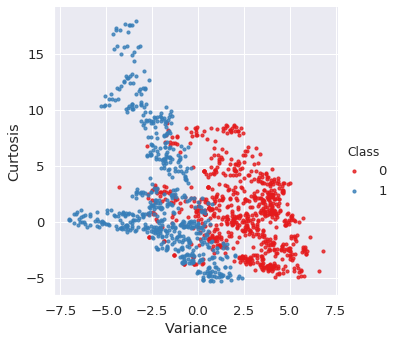

In [87]:
sns.lmplot('Variance','Curtosis',data=dataset,hue='Class',palette='Set1',fit_reg=False,scatter_kws={"s":10})


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


In [89]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_pred = svclassifier.predict(X_test)

In [91]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[156   2]
 [  1 116]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       158
           1       0.98      0.99      0.99       117

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [0]:
w=svclassifier.coef_[0]

In [0]:
a=-w[0]/w[1]

In [0]:
xx=np.linspace(5,8)
yy=a*xx-(svclassifier.intercept_[0])/w[1]
b=svclassifier.support_vectors_[0]
yy_down=a*xx+(b[1]-a*b[0])
b=svclassifier.support_vectors_[-1]
yy_up=a*xx+(b[1]-a*b[0])

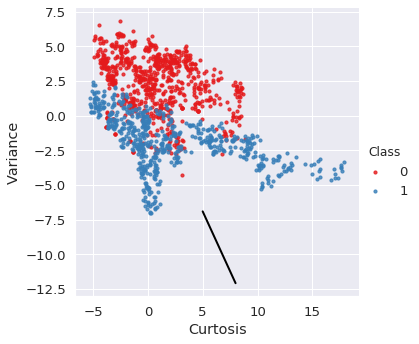

In [95]:
sns.lmplot('Curtosis','Variance',data=dataset,hue='Class',palette='Set1',fit_reg=False,scatter_kws={"s":10})
plt.plot(xx, yy, linewidth=2, color='black')

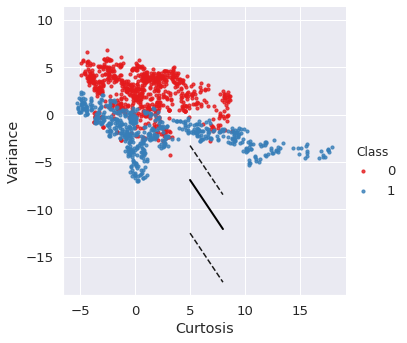

In [96]:
sns.lmplot('Curtosis','Variance',data=dataset,hue='Class',palette='Set1',fit_reg=False,scatter_kws={"s":10})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(svclassifier.support_vectors_[:, 0], svclassifier.support_vectors_[:, 1],
            s=80, facecolors='none');

In [97]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9890909090909091